# **LINEAR REGRESSION BLOCK START**

In [1]:
# Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def load_dataset():
    """ Reads dataset csv and returns pandas dataframe """
    
    filepath = "Hitters_Adjusted_Salary.csv"

    df = pd.read_csv(filepath, encoding="utf-8", low_memory=False)
    
    return df

In [4]:
def clean_dataset(a_df):
    """ Returns deduped, na-dropped, index-reset dataframe """    
    
    a_df = a_df.drop_duplicates()   
        
    a_df = a_df.dropna()
    
    a_df = a_df.drop(["Unnamed: 0", "yearID", "playerID", "teamID", "lgID", "salary", "PO", "A", "E", "DP"], axis=1)
        
    a_df = a_df.reset_index(drop=True)
    
    return a_df   

In [5]:
def rename_columns(a_df):
    """ Returns dataframe with meaningful column names """    
    
    abbr_dict = {"GS": "games_started", "InnOuts": "inning_outs", "G": "games_played", "AB": "at_bats",\
                "R": "runs", "H": "hits", "2B": "doubles", "3B": "triples", "HR": "home_runs",\
                "RBI": "runs_batted_in", "SB": "stolen_bases", "CS": "caught_stealing", "BB": "base_on_balls",\
                "SO": "strike_outs", "IBB": "intentional_walks", "HBP": "hit_by_pitch", "SH": "sacrifice_hits",\
                "SF": "sacrifice_flies", "GIDP": "ground_into_double_play"}
    
    a_df = a_df.rename(columns=abbr_dict)
    
    return a_df   

In [6]:
def examine_dataset(a_df):
    """ Provides summary info and visualizations of dataset """
    
    print(a_df.info())
    
    a_df.hist(figsize = (15, 15))  
    

In [7]:
def round_salaries(a_df):
    """ Returns dataframe with salary column made into int and rounded """

    a_df["ADJ Salary"] = a_df["ADJ Salary"].astype("int").round()

    return a_df

In [8]:
def run_regression(a_df, salary_col_name="ADJ Salary"):
    """ Runs linear regression on dataframe, prints model scores """

    # Assign X and y

    X = a_df.drop([salary_col_name], axis=1)
    y = a_df[salary_col_name]
    
    # Split the data into X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Create a scaler to standardize the data

    scaler = StandardScaler()

    # Train the scaler with the X_train data.

    scaler.fit(X_train)

    # Transform X_train and X_test.

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearRegression().fit(X_train_scaled, y_train)
    
    predicted = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    
    print(f"MSE: {mse}")
    print(f"R2: {r2}") 
    
    # Score the model

    print(f"Linear Regression Training Data Score: {model.score(X_train_scaled, y_train)}")
    print(f"Linear Regression Testing Data Score: {model.score(X_test_scaled, y_test)}")  
    
    plt.bar(np.arange(len(model.coef_)), model.coef_)
    plt.title(f'Linear Regression coefficient plot')
    plt.show()  

In [9]:
def run_LASSO(a_df):
    """ Runs LASSO regression on dataframe, prints model scores """

    # Assign X and y

    X = a_df.drop(["log_of_salary"], axis=1)
    y = a_df["log_of_salary"]
    
    # Split the data into X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Create a scaler to standardize the data

    scaler = StandardScaler()

    # Train the scaler with the X_train data.

    scaler.fit(X_train)

    # Transform X_train and X_test.

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    lasso_reg = Lasso().fit(X_train, y_train)

    predicted = lasso_reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    
    print(f"MSE: {mse}")
    print(f"R2: {r2}") 

    # Score the model

    print(f"LASSO Regression Training Data Score: {lasso_reg.score(X_train_scaled, y_train)}")
    print(f"LASSO Regression Testing Data Score: {lasso_reg.score(X_test_scaled, y_test)}")
    
    plt.bar(np.arange(len(lasso_reg.coef_)), lasso_reg.coef_)
    plt.title(f'LASSO Regression coefficient plot')
    plt.show()  
    
    sel = SelectFromModel(lasso_reg)
    sel.fit(X_train_scaled, y_train)
    SelectFromModel(estimator=Lasso())
    
    X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
    
    scaler = StandardScaler().fit(X_selected_train)
    
    X_selected_train_scaled = scaler.transform(X_selected_train)
    X_selected_test_scaled = scaler.transform(X_selected_test)

    new_lasso_reg = LinearRegression().fit(X_selected_train_scaled, y_train)
    print(f"New linear regression score: {new_lasso_reg.score(X_selected_test_scaled, y_test)}")

In [62]:
def run_Ridge(a_df):
    """ Runs Ridge regression on dataframe, prints model scores """

    # Assign X and y

    X = a_df.drop(["log_of_salary"], axis=1)
    y = a_df["log_of_salary"]
    
    # Split the data into X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Create a scaler to standardize the data

    scaler = StandardScaler()

    # Train the scaler with the X_train data.

    scaler.fit(X_train)

    # Transform X_train and X_test.

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    ridge_reg = Ridge().fit(X_train, y_train)

    predicted = ridge_reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    
    print(f"MSE: {mse}")
    print(f"R2: {r2}") 

    # Score the model

    print(f"Ridge Regression Training Data Score: {ridge_reg.score(X_train_scaled, y_train)}")
    print(f"Ridge Regression Testing Data Score: {ridge_reg.score(X_test_scaled, y_test)}")

    plt.bar(np.arange(len(ridge_reg.coef_)), ridge_reg.coef_)
    plt.title(f'Ridge Regression coefficient plot')
    plt.show()     
    
    sel = SelectFromModel(ridge_reg)
    sel.fit(X_train_scaled, y_train)
    SelectFromModel(estimator=Ridge())
    print(sel.get_support())
    
    X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
    
    scaler = StandardScaler().fit(X_selected_train)
    
    X_selected_train_scaled = scaler.transform(X_selected_train)
    X_selected_test_scaled = scaler.transform(X_selected_test)

    new_ridge_reg = LinearRegression().fit(X_selected_train_scaled, y_train)
    print(f"New linear regression score: {new_ridge_reg.score(X_selected_test_scaled, y_test)}")

In [11]:
def run_ElasticNet(a_df):
    """ Runs ElasticNet regression on dataframe, prints model scores """

    # Assign X and y

    X = a_df.drop(["log_of_salary"], axis=1)
    y = a_df["log_of_salary"]
    
    # Split the data into X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Create a scaler to standardize the data

    scaler = StandardScaler()

    # Train the scaler with the X_train data.

    scaler.fit(X_train)

    # Transform X_train and X_test.

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    elasticnet_reg = ElasticNet().fit(X_train, y_train)
      
    predicted = elasticnet_reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    
    print(f"MSE: {mse}")
    print(f"R2: {r2}") 

    # Score the model

    print(f"ElasticNet Regression Training Data Score: {elasticnet_reg.score(X_train_scaled, y_train)}")
    print(f"ElasticNet Regression Testing Data Score: {elasticnet_reg.score(X_test_scaled, y_test)}")
    
    plt.bar(np.arange(len(elasticnet_reg.coef_)), elasticnet_reg.coef_)
    plt.title(f'ElasticNet Regression coefficient plot')
    plt.show()  
    
    sel = SelectFromModel(elasticnet_reg)
    sel.fit(X_train_scaled, y_train)
    SelectFromModel(estimator=ElasticNet())
    
    X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
    
    scaler = StandardScaler().fit(X_selected_train)
    
    X_selected_train_scaled = scaler.transform(X_selected_train)
    X_selected_test_scaled = scaler.transform(X_selected_test)

    new_elasticnet_reg = LinearRegression().fit(X_selected_train_scaled, y_train)
    print(f"New linear regression score: {new_elasticnet_reg.score(X_selected_test_scaled, y_test)}")

In [12]:
loaded_df = load_dataset()

In [13]:
loaded_df["ADJ Salary"] = loaded_df["ADJ Salary"].astype(int)

loaded_df = loaded_df.loc[~(loaded_df["ADJ Salary"] <= 0), :]

In [14]:
clean_df = clean_dataset(loaded_df)

In [15]:
clean_df = rename_columns(clean_df)

In [16]:
clean_df.head(10)

,ADJ Salary,games_started,inning_outs,games_played,at_bats,runs,hits,doubles,triples,home_runs,runs_batted_in,stolen_bases,caught_stealing,base_on_balls,strike_outs,intentional_walks,hit_by_pitch,sacrifice_hits,sacrifice_flies,ground_into_double_play
0,1310892,67.0,1698.0,70,208,12,42,6,0,0,20.0,0.0,1.0,22,12.0,1.0,1.0,4.0,2.0,8.0
1,1503316,76.0,2097.0,96,282,15,61,9,0,3,25.0,0.0,3.0,29,25.0,1.0,1.0,0.0,4.0,15.0
2,1924245,27.0,814.0,101,170,16,40,7,0,3,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0
3,601326,124.0,3299.0,138,492,58,130,15,2,17,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0
4,3607960,125.0,3196.0,130,483,61,129,25,3,27,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0
5,1094414,130.0,3425.0,142,439,51,102,21,0,5,39.0,4.0,3.0,56,54.0,2.0,4.0,7.0,6.0,11.0
6,1864112,113.0,3009.0,130,444,52,123,25,2,8,61.0,6.0,7.0,37,57.0,8.0,0.0,1.0,6.0,9.0
7,3908623,161.0,4264.0,162,616,118,185,32,2,37,111.0,10.0,3.0,90,141.0,15.0,1.0,0.0,5.0,14.0
8,1483273,113.0,3041.0,134,412,30,112,19,4,3,35.0,1.0,2.0,51,38.0,6.0,6.0,1.0,2.0,10.0
9,288636,50.0,1325.0,110,238,22,51,5,0,3,13.0,9.0,5.0,23,28.0,1.0,0.0,0.0,1.0,7.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15022 entries, 0 to 15021
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ADJ Salary               15022 non-null  int32  
 1   games_started            15022 non-null  float64
 2   inning_outs              15022 non-null  float64
 3   games_played             15022 non-null  int64  
 4   at_bats                  15022 non-null  int64  
 5   runs                     15022 non-null  int64  
 6   hits                     15022 non-null  int64  
 7   doubles                  15022 non-null  int64  
 8   triples                  15022 non-null  int64  
 9   home_runs                15022 non-null  int64  
 10  runs_batted_in           15022 non-null  float64
 11  stolen_bases             15022 non-null  float64
 12  caught_stealing          15022 non-null  float64
 13  base_on_balls            15022 non-null  int64  
 14  strike_outs           

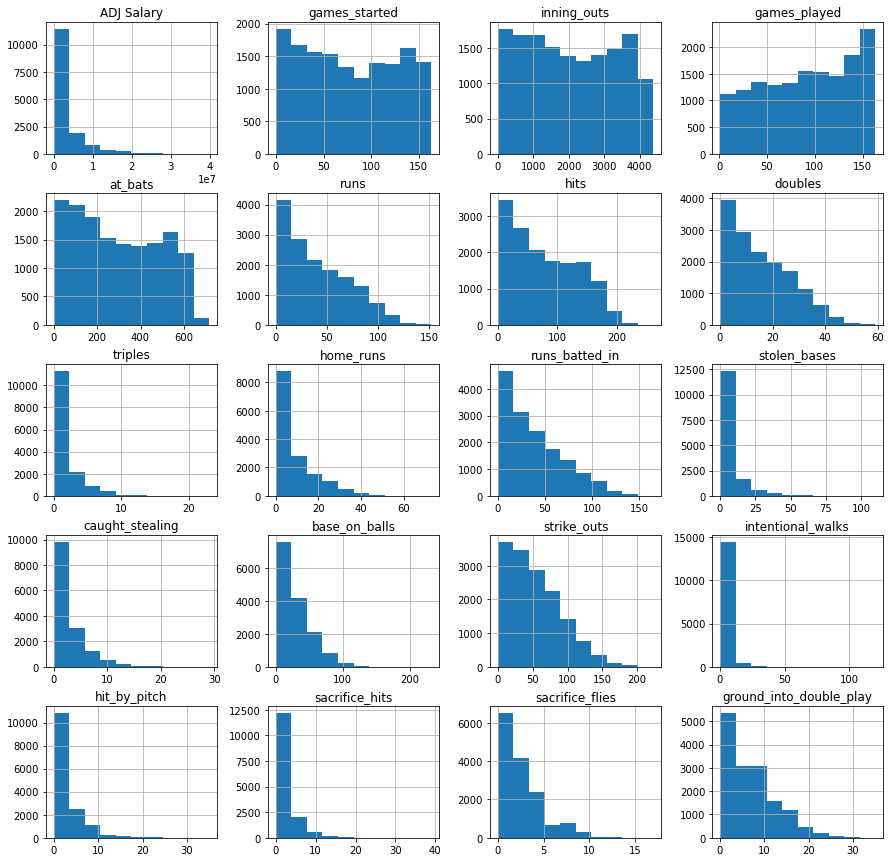

In [17]:
examine_dataset(clean_df)

In [18]:
clean_df = round_salaries(clean_df)

In [19]:
clean_df["log_of_salary"] = np.log(clean_df["ADJ Salary"])

In [20]:
clean_df["log_of_salary"].describe()

count    15022.000000
mean        14.050117
std          1.314890
min          9.879297
25%         13.033089
50%         13.842179
75%         15.131481
max         17.499634
Name: log_of_salary, dtype: float64

MSE: 6006542884210.203
R2: 0.7093099044793149
Linear Regression Training Data Score: 0.7140955075061826
Linear Regression Testing Data Score: 0.7093099044793149


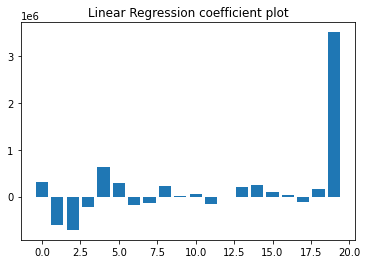

In [21]:
run_regression(clean_df, "ADJ Salary")

MSE: 0.49110614851979023
R2: 0.719555763101845
Linear Regression Training Data Score: 0.7279425139716458
Linear Regression Testing Data Score: 0.719555763101845


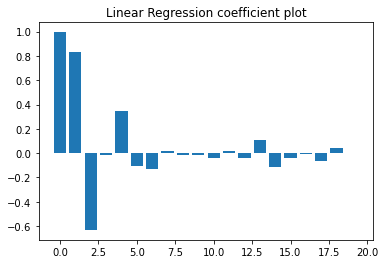

In [22]:
run_regression(clean_df, "log_of_salary")

MSE: 2.9229648390613354
R2: -0.6691475890525569
LASSO Regression Training Data Score: -0.6308733557829966
LASSO Regression Testing Data Score: -0.6691475890525569


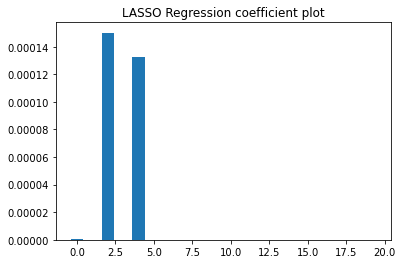

New linear regression score: 0.7017304987850443


In [23]:
run_LASSO(clean_df)

MSE: 2.8321248333666245
R2: -0.6172737606477172
Ridge Regression Training Data Score: -0.5798838827332813
Ridge Regression Testing Data Score: -0.6172737606477172


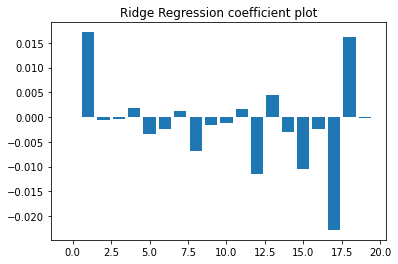

[ True  True  True False  True False False False False False False False
 False False False False False False False False]
New linear regression score: 0.7291495360671354


TypeError: 'DataFrame' object is not callable

In [63]:
run_Ridge(clean_df)

MSE: 2.918066082631801
R2: -0.6663501734372739
ElasticNet Regression Training Data Score: -0.6281099684792957
ElasticNet Regression Testing Data Score: -0.6663501734372739


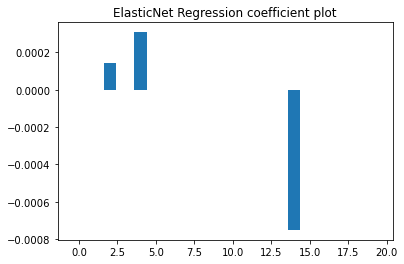

New linear regression score: 0.7017304987850443


In [25]:
run_ElasticNet(clean_df)

# Results:

- Using the logarithm of the ADJ Salary column values improved the regression score
    - I had to eliminate any salary values <= 0 to make this work
- Ridge regression achieved the best score: 0.7291495360671353

# To Do:

- Add / remove features from the dataset?


# **LINEAR REGRESSION BLOCK END**

# **PCA START BLOCK**

In [26]:
clean_df.head(10)

,ADJ Salary,games_started,inning_outs,games_played,at_bats,runs,hits,doubles,triples,home_runs,runs_batted_in,stolen_bases,caught_stealing,base_on_balls,strike_outs,intentional_walks,hit_by_pitch,sacrifice_hits,sacrifice_flies,ground_into_double_play,log_of_salary
0,1310892,67.0,1698.0,70,208,12,42,6,0,0,20.0,0.0,1.0,22,12.0,1.0,1.0,4.0,2.0,8.0,14.086218
1,1503316,76.0,2097.0,96,282,15,61,9,0,3,25.0,0.0,3.0,29,25.0,1.0,1.0,0.0,4.0,15.0,14.223184
2,1924245,27.0,814.0,101,170,16,40,7,0,3,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0,14.470044
3,601326,124.0,3299.0,138,492,58,130,15,2,17,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0,13.306892
4,3607960,125.0,3196.0,130,483,61,129,25,3,27,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0,15.098653
5,1094414,130.0,3425.0,142,439,51,102,21,0,5,39.0,4.0,3.0,56,54.0,2.0,4.0,7.0,6.0,11.0,13.905730
6,1864112,113.0,3009.0,130,444,52,123,25,2,8,61.0,6.0,7.0,37,57.0,8.0,0.0,1.0,6.0,9.0,14.438295
7,3908623,161.0,4264.0,162,616,118,185,32,2,37,111.0,10.0,3.0,90,141.0,15.0,1.0,0.0,5.0,14.0,15.178696
8,1483273,113.0,3041.0,134,412,30,112,19,4,3,35.0,1.0,2.0,51,38.0,6.0,6.0,1.0,2.0,10.0,14.209762
9,288636,50.0,1325.0,110,238,22,51,5,0,3,13.0,9.0,5.0,23,28.0,1.0,0.0,0.0,1.0,7.0,12.572922


In [27]:
clean_df.columns

Index(['ADJ Salary', 'games_started', 'inning_outs', 'games_played', 'at_bats', 'runs', 'hits', 'doubles', 'triples', 'home_runs', 'runs_batted_in', 'stolen_bases', 'caught_stealing', 'base_on_balls', 'strike_outs', 'intentional_walks', 'hit_by_pitch', 'sacrifice_hits', 'sacrifice_flies', 'ground_into_double_play', 'log_of_salary'], dtype='object')

In [28]:
#import dependencies
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [65]:
# Drop ADJ Salary column
clean_df2= clean_df.drop(columns=["ADJ Salary", "log_of_salary"], axis=1)
clean_df2.head()

,games_started,inning_outs,games_played,at_bats,runs,hits,doubles,triples,home_runs,runs_batted_in,stolen_bases,caught_stealing,base_on_balls,strike_outs,intentional_walks,hit_by_pitch,sacrifice_hits,sacrifice_flies,ground_into_double_play
0,67.0,1698.0,70,208,12,42,6,0,0,20.0,0.0,1.0,22,12.0,1.0,1.0,4.0,2.0,8.0
1,76.0,2097.0,96,282,15,61,9,0,3,25.0,0.0,3.0,29,25.0,1.0,1.0,0.0,4.0,15.0
2,27.0,814.0,101,170,16,40,7,0,3,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0
3,124.0,3299.0,138,492,58,130,15,2,17,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0
4,125.0,3196.0,130,483,61,129,25,3,27,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0


In [66]:
clean_df2.shape

(15022, 19)

In [67]:
# Standardize the dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.
clean_scaled = StandardScaler().fit_transform(clean_df2)
print(clean_scaled)

[[-0.21946936 -0.29708951 -0.44990784 ...  0.7625867  -0.2136137
   0.22776194]
 [-0.03461319  0.01715468  0.10048573 ... -0.65386801  0.59122829
   1.48690072]
 [-1.04105233 -0.99330971  0.20633065 ... -0.65386801 -0.6160347
  -0.31186897]
 ...
 [-0.60972127 -0.55069008 -0.32289394 ... -0.65386801 -0.6160347
  -0.85149988]
 [ 1.13614255  1.10165153  1.09542796 ... -0.65386801  1.39607028
   1.84665466]
 [ 0.62265319  0.655094    0.50269642 ... -0.65386801  1.39607028
   0.94726982]]


In [68]:
# Perform dimensionality reduction with PCA preserving 90% of the explained variance ( n_components=0.90)
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
clean_pca = pca.fit_transform(clean_scaled)

In [69]:
clean_pca.shape

(15022, 8)

In [70]:
clean_df_pca = pd.DataFrame(data=clean_pca)
clean_df_pca

,0,1,2,3,4,5,6,7
0,-2.129087,0.161910,-1.100495,0.750240,0.413869,0.228469,-0.291529,0.313656
1,-0.812263,-0.605899,-0.725071,0.803249,-0.756268,0.768016,-0.791486,0.857769
2,-2.517841,-0.858025,0.346344,0.621712,0.270550,0.078708,-0.001087,0.034308
3,2.921410,0.374642,0.490947,0.075936,-0.319485,-0.527231,-1.116217,0.446234
4,3.381022,-1.862330,-0.364849,1.154439,-1.232124,0.178810,0.342836,0.118224
...,...,...,...,...,...,...,...,...
15017,0.258709,2.101152,0.223879,-0.084471,-1.052395,0.202390,1.260813,0.859611
15018,-1.911498,-0.738365,-0.477140,0.077895,-0.260811,1.062100,0.042201,-0.694543
15019,-1.601160,0.383346,0.839671,-0.577371,-0.489467,-0.329259,-0.961293,-0.577229
15020,4.103379,-1.846471,-0.981895,-0.328573,-1.195937,-0.358338,-1.064818,-0.783961


In [71]:
# Transform PCA data to a DataFrame
clean_df_pca = pd.DataFrame(data=clean_pca, columns=["principal component 1", "principal component 2",
                                                                "principal component 3","principal component 4",
                                                                 "principal component 5","principal component 6",
                                                                 "principal component 7","principal component 8"])
clean_df_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,-2.129087,0.161910,-1.100495,0.750240,0.413869,0.228469,-0.291529,0.313656
1,-0.812263,-0.605899,-0.725071,0.803249,-0.756268,0.768016,-0.791486,0.857769
2,-2.517841,-0.858025,0.346344,0.621712,0.270550,0.078708,-0.001087,0.034308
3,2.921410,0.374642,0.490947,0.075936,-0.319485,-0.527231,-1.116217,0.446234
4,3.381022,-1.862330,-0.364849,1.154439,-1.232124,0.178810,0.342836,0.118224


In [72]:
clean_df_pca.columns

Index(['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'], dtype='object')

In [73]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.61738325, 0.11028305, 0.04828503, 0.03961491, 0.0327156 ,
       0.02543374, 0.02532171, 0.02367976])

In [74]:
# Further reduce the dataset dimensions with t-SNE

# Initialize t-SNE model
tsne = TSNE(learning_rate = 50)

# Reduce dimensions
tsne_features = tsne.fit_transform(clean_pca)

# The dataset has 2 columns
tsne_features.shape

(15022, 2)

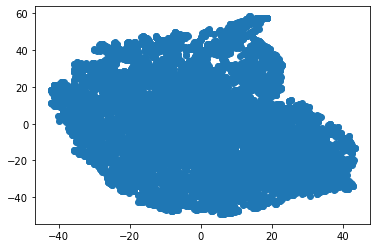

In [75]:
# Prepare to plot the dataset

# The first column of transformed features
clean_df2["x"] = tsne_features[:,0]

# The second column of transformed features
clean_df2["y"] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(clean_df2["x"],clean_df2["y"])
plt.show()

In [76]:
labels = clean_df["ADJ Salary"]
labels.value_counts()

185107      93
198019      92
310697      86
269925      76
195227      75
            ..
10161904     1
10345815     1
5716071      1
5689607      1
23436394     1
Name: ADJ Salary, Length: 6765, dtype: int64

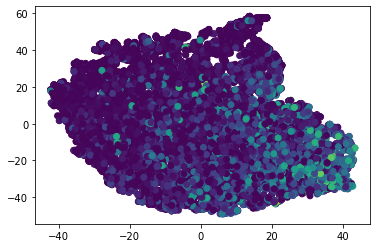

In [77]:
# Visualize the clusters with color
plt.scatter(clean_df2["x"],clean_df2["y"], c=labels)
plt.show()

# Perform a Cluster Analysis with K-means

In [78]:
#Windows KMeans bug fix. 
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [79]:
# Finding the best value for k using the Elbow Curve
inertia = []
k = list(range(1, 9))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(clean_df_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,263360.053561
1,2,130515.050310
2,3,106706.936498
3,4,90652.102933
4,5,82330.294021
5,6,77575.538238
6,7,73006.549961
7,8,69976.982407


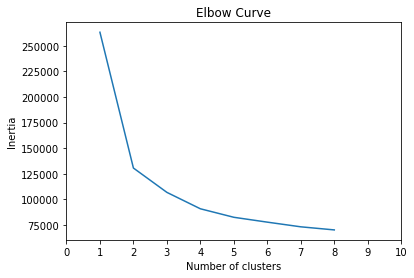

In [80]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [81]:
# If possible, determine where the elbow of the plot is, and at which value of k it appears.
# Create a function called `get_clusters(k, data)` that finds the `k` clusters using K-Means on `data`. The function should return a DataFrame copy of `Data` that should include a new column containing the clusters found.

def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [82]:
clusters = get_clusters(2, clean_df_pca)
clusters

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,class
0,-2.129087,0.161910,-1.100495,0.750240,0.413869,0.228469,-0.291529,0.313656,1
1,-0.812263,-0.605899,-0.725071,0.803249,-0.756268,0.768016,-0.791486,0.857769,1
2,-2.517841,-0.858025,0.346344,0.621712,0.270550,0.078708,-0.001087,0.034308,1
3,2.921410,0.374642,0.490947,0.075936,-0.319485,-0.527231,-1.116217,0.446234,0
4,3.381022,-1.862330,-0.364849,1.154439,-1.232124,0.178810,0.342836,0.118224,0
...,...,...,...,...,...,...,...,...,...
15017,0.258709,2.101152,0.223879,-0.084471,-1.052395,0.202390,1.260813,0.859611,1
15018,-1.911498,-0.738365,-0.477140,0.077895,-0.260811,1.062100,0.042201,-0.694543,1
15019,-1.601160,0.383346,0.839671,-0.577371,-0.489467,-0.329259,-0.961293,-0.577229,1
15020,4.103379,-1.846471,-0.981895,-0.328573,-1.195937,-0.358338,-1.064818,-0.783961,0


In [83]:
def show_clusters(df):
    plt.scatter(df['principal component 1'], df['principal component 2'], c=df['class'])
    plt.xlabel('principal component 1')
    plt.ylabel('principal component 2')
    plt.title("ADJ Salary clusters")
    plt.show()

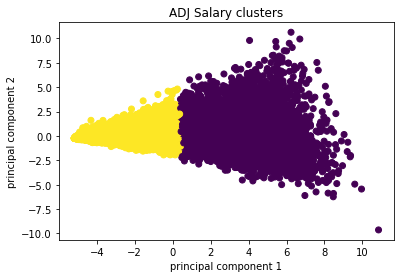

In [84]:
show_clusters(clusters)

# **PCA END BLOCK**